In [189]:
import shutil
import pandas as pd
import pandas_profiling
from scipy.stats import ttest_ind, chisquare
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

#Numeric packages
import random
import numpy as np
import pandas as pd
from pandas.io import gbq

import matplotlib.patches as mpatches
import matplotlib as mat

from collections import Counter

#Stats packages
from scipy import stats

#ML packages
from sklearn import tree
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.externals import joblib
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, roc_curve, auc, recall_score
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score


#ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import NearestNeighbors
from sklearn.svm import SVR

#Plotting packages
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sn

#Imbalance package
#oversample
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SMOTENC

#undersample
from imblearn.under_sampling import (ClusterCentroids, RandomUnderSampler,
                                     NearMiss,
                                     InstanceHardnessThreshold,
                                     CondensedNearestNeighbour,
                                     EditedNearestNeighbours,
                                     RepeatedEditedNearestNeighbours,
                                     AllKNN,
                                     NeighbourhoodCleaningRule,
                                     OneSidedSelection)

#combination methods
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek

#ensemble methods
from imblearn.ensemble import (EasyEnsemble, EasyEnsembleClassifier, RUSBoostClassifier, 
                               BalancedRandomForestClassifier, BalanceCascade,
                               BalancedBaggingClassifier)

#Random
from operator import itemgetter
import collections
from sklearn.datasets import make_classification
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Concatenating all the "Origination" files into one .txt file
filenames = ['historical_data1_Q12017.txt', 'historical_data1_Q22017.txt', 'historical_data1_Q32017.txt', 'historical_data1_Q42017.txt', 'historical_data1_Q12016.txt', 'historical_data1_Q22016.txt', 'historical_data1_Q32016.txt', 'historical_data1_Q42016.txt']
with open('output_file.txt','wb') as wfd:
    for f in filenames:
        with open(f,'rb') as fd:
            shutil.copyfileobj(fd, wfd, 1024*1024*10)

In [3]:

# Concatenating all the "Performance" files into one .txt file
filenames_time = ['historical_data1_time_Q12017.txt', 'historical_data1_time_Q22017.txt', 'historical_data1_time_Q32017.txt', 'historical_data1_time_Q42017.txt', 'historical_data1_time_Q12016.txt', 'historical_data1_time_Q22016.txt', 'historical_data1_time_Q32016.txt', 'historical_data1_time_Q42016.txt']
with open('output_time_file.txt','wb') as wfd:
    for f in filenames_time:
        with open(f,'rb') as fd:
            shutil.copyfileobj(fd, wfd, 1024*1024*10)

In [157]:
# Origin DataFrame
df = pd.read_csv('output_file.txt', sep="|", header = None)

In [158]:
dfBkp = df

In [159]:
len(df)

2775499

In [160]:
(df[2].mode())[0]

'9'

In [161]:
df[0].fillna(df[0].mean(), inplace = True)
df[1].fillna((df[1].mode())[0], inplace = True)
df[2].fillna((df[2].mode())[0], inplace = True)
df[3].fillna((df[3].mode())[0], inplace = True)
df[4].fillna((df[4].mode())[0], inplace = True)
df[5].fillna(df[5].mean(), inplace = True)
df[6].fillna((df[6].mode())[0], inplace = True)
df[7].fillna((df[7].mode())[0], inplace = True)
df[8].fillna(df[8].mean(), inplace = True)
df[9].fillna(df[9].mean(), inplace = True)
df[10].fillna(df[10].mean(), inplace = True)
df[11].fillna(df[11].mean(), inplace = True)
df[12].fillna(df[12].mean(), inplace = True)
df[13].fillna((df[13].mode())[0], inplace = True)
df[14].fillna((df[14].mode())[0], inplace = True)
df[15].fillna((df[15].mode())[0], inplace = True)
df[16].fillna((df[16].mode())[0], inplace = True)
df[17].fillna((df[17].mode())[0], inplace = True)
df[18].fillna((df[18].mode())[0], inplace = True)
df[19].fillna((df[19].mode())[0], inplace = True)
df[20].fillna((df[20].mode())[0], inplace = True)
df[21].fillna((df[21].mode())[0], inplace = True)
df[20].fillna((df[20].mode())[0], inplace = True)
df[21].fillna(df[21].mean(), inplace = True)
df[22].fillna((df[22].mode())[0], inplace = True)
df[23].fillna((df[23].mode())[0], inplace = True)
df[24].fillna((df[24].mode())[0], inplace = True)
df[25].fillna("N", inplace = True)

In [162]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,714,201705,9,204704,43580.0,25,1,P,87,42,...,IA,SF,51000.0,F117Q1000001,N,360,1,Other sellers,Other servicers,N
1,809,201705,9,204704,31084.0,0,1,P,75,38,...,PA,SF,17900.0,F117Q1000002,N,360,1,Other sellers,SPECIALIZEDLOANSERVI,N
2,745,201703,9,203202,33340.0,0,1,P,73,38,...,WI,SF,53200.0,F117Q1000003,N,180,1,Other sellers,"PNCBANK,NATL",N
3,717,201704,9,203203,31084.0,0,1,P,80,33,...,IL,SF,60900.0,F117Q1000004,C,180,1,Other sellers,Other servicers,N
4,809,201704,9,204703,31084.0,0,1,P,80,39,...,PA,SF,17800.0,F117Q1000005,C,360,1,Other sellers,Other servicers,N


In [163]:
len(df)

2775499

In [164]:
len(df[df[0] < 700])

442052

In [22]:
per_df1 = pd.read_csv('historical_data1_time_Q12016.txt', sep="|", header = None)
per_df1 = pd.concat([per_df1.ix[:,0:5],per_df1.ix[:,10]], axis=1)
per_df1.columns = ['loan_id','mon_rep_dt','UPB','default_status','loan_age','maturity_rem_months','modified_rate']
per_df1 = per_df1.loc[per_df1.reset_index().groupby(['loan_id'])['loan_age'].idxmax()]
per_df1.head()

C:\Users\haris\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (3,7,14,23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\haris\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,loan_id,mon_rep_dt,UPB,default_status,loan_age,maturity_rem_months,modified_rate
26,F116Q1000001,201806,77125.45,0,26,334,3.750
53,F116Q1000002,201806,103699.36,0,26,154,3.000
82,F116Q1000003,201806,149815.97,0,28,332,3.950
110,F116Q1000004,201806,304826.75,0,27,333,3.625
139,F116Q1000005,201806,0.00,0,28,213,3.750


In [23]:
per_df2 = pd.read_csv('historical_data1_time_Q22016.txt', sep="|", header = None)
per_df2 = pd.concat([per_df2.ix[:,0:5],per_df2.ix[:,10]], axis=1)
per_df2.columns = ['loan_id','mon_rep_dt','UPB','default_status','loan_age','maturity_rem_months','modified_rate']
per_df2 = per_df2.loc[per_df2.reset_index().groupby(['loan_id'])['loan_age'].idxmax()]
per_df2.head()

C:\Users\haris\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,loan_id,mon_rep_dt,UPB,default_status,loan_age,maturity_rem_months,modified_rate
24,F116Q2000001,201806,39047.66,0,24,97,3.000
48,F116Q2000002,201806,374804.24,0,23,337,4.000
72,F116Q2000003,201806,289242.27,0,23,337,3.750
96,F116Q2000004,201806,335258.07,0,23,337,3.625
121,F116Q2000005,201806,388859.18,0,24,336,3.750


In [24]:
per_df3 = pd.read_csv('historical_data1_time_Q32016.txt', sep="|", header = None)
per_df3 = pd.concat([per_df3.ix[:,0:5],per_df3.ix[:,10]], axis=1)
per_df3.columns = ['loan_id','mon_rep_dt','UPB','default_status','loan_age','maturity_rem_months','modified_rate']
per_df3 = per_df3.loc[per_df3.reset_index().groupby(['loan_id'])['loan_age'].idxmax()]
per_df3.head()

C:\Users\haris\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,loan_id,mon_rep_dt,UPB,default_status,loan_age,maturity_rem_months,modified_rate
20,F116Q3000001,201806,321665.09,0,20,340,3.250
41,F116Q3000002,201806,312313.94,0,20,220,3.125
62,F116Q3000003,201806,232232.78,0,20,340,3.500
84,F116Q3000004,201806,251813.81,0,21,159,2.625
107,F116Q3000005,201806,150981.55,0,22,158,2.750


In [25]:
per_df4 = pd.read_csv('historical_data1_time_Q42016.txt', sep="|", header = None)
per_df4 = pd.concat([per_df4.ix[:,0:5],per_df4.ix[:,10]], axis=1)
per_df4.columns = ['loan_id','mon_rep_dt','UPB','default_status','loan_age','maturity_rem_months','modified_rate']
per_df4 = per_df4.loc[per_df4.reset_index().groupby(['loan_id'])['loan_age'].idxmax()]
per_df4.head()

C:\Users\haris\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,loan_id,mon_rep_dt,UPB,default_status,loan_age,maturity_rem_months,modified_rate
18,F116Q4000001,201806,198828.03,0,18,222,3.500
37,F116Q4000002,201806,503135.64,0,18,342,3.625
57,F116Q4000003,201806,217948.44,0,19,341,3.625
68,F116Q4000004,201711,0.00,1,10,351,4.375
88,F116Q4000005,201806,146641.95,0,19,341,3.375


In [26]:
per_df5 = pd.read_csv('historical_data1_time_Q12017.txt', sep="|", header = None)
per_df5 = pd.concat([per_df5.ix[:,0:5],per_df5.ix[:,10]], axis=1)
per_df5.columns = ['loan_id','mon_rep_dt','UPB','default_status','loan_age','maturity_rem_months','modified_rate']
per_df5 = per_df5.loc[per_df5.reset_index().groupby(['loan_id'])['loan_age'].idxmax()]
per_df5.head()

C:\Users\haris\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,loan_id,mon_rep_dt,UPB,default_status,loan_age,maturity_rem_months,modified_rate
7,F117Q1000001,201710,0.00,0,7,354,4.375
22,F117Q1000002,201806,190042.25,0,14,346,4.250
39,F117Q1000003,201806,202484.77,0,16,164,3.125
44,F117Q1000004,201707,0.00,0,4,176,4.250
60,F117Q1000005,201806,237818.60,0,15,345,4.125


In [27]:
per_df6 = pd.read_csv('historical_data1_time_Q22017.txt', sep="|", header = None)
per_df6 = pd.concat([per_df6.ix[:,0:5],per_df6.ix[:,10]], axis=1)
per_df6.columns = ['loan_id','mon_rep_dt','UPB','default_status','loan_age','maturity_rem_months','modified_rate']
per_df6 = per_df6.loc[per_df6.reset_index().groupby(['loan_id'])['loan_age'].idxmax()]
per_df6.head()

C:\Users\haris\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,loan_id,mon_rep_dt,UPB,default_status,loan_age,maturity_rem_months,modified_rate
11,F117Q2000001,201806,222651.94,0,11,229,3.875
23,F117Q2000002,201806,78294.57,0,11,349,4.625
35,F117Q2000003,201806,61508.52,0,11,349,4.000
48,F117Q2000004,201806,400095.48,0,12,168,3.375
61,F117Q2000005,201806,91962.58,0,12,168,3.750


In [28]:
per_df7 = pd.read_csv('historical_data1_time_Q32017.txt', sep="|", header = None)
per_df7 = pd.concat([per_df7.ix[:,0:5],per_df7.ix[:,10]], axis=1)
per_df7.columns = ['loan_id','mon_rep_dt','UPB','default_status','loan_age','maturity_rem_months','modified_rate']
per_df7 = per_df7.loc[per_df7.reset_index().groupby(['loan_id'])['loan_age'].idxmax()]
per_df7.head()

C:\Users\haris\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (7,23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\haris\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,loan_id,mon_rep_dt,UPB,default_status,loan_age,maturity_rem_months,modified_rate
8,F117Q3000001,201806,311326.49,0,8,352,4.000
19,F117Q3000002,201806,114751.89,0,10,170,3.250
30,F117Q3000003,201806,66143.37,0,10,230,4.125
41,F117Q3000004,201806,156644.05,0,10,350,3.625
48,F117Q3000005,201803,0.00,0,6,354,4.000


In [29]:
per_df8 = pd.read_csv('historical_data1_time_Q42017.txt', sep="|", header = None)
per_df8 = pd.concat([per_df8.ix[:,0:5],per_df8.ix[:,10]], axis=1)
per_df8.columns = ['loan_id','mon_rep_dt','UPB','default_status','loan_age','maturity_rem_months','modified_rate']
per_df8 = per_df8.loc[per_df8.reset_index().groupby(['loan_id'])['loan_age'].idxmax()]
per_df8.head()

C:\Users\haris\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,loan_id,mon_rep_dt,UPB,default_status,loan_age,maturity_rem_months,modified_rate
6,F117Q4000001,201806,117000.00,0,6,354,4.000
8,F117Q4000002,201801,0.00,0,1,359,4.250
16,F117Q4000003,201806,108154.19,0,7,353,4.125
24,F117Q4000004,201806,192751.85,0,7,173,3.375
32,F117Q4000005,201806,130885.87,0,7,173,3.250


In [44]:
all_frames = [per_df1,per_df2,per_df3,per_df4,per_df5,per_df6,per_df7,per_df8]
final_df = pd.concat(all_frames, ignore_index=True)
final_df.head()

,loan_id,mon_rep_dt,UPB,default_status,loan_age,maturity_rem_months,modified_rate
0,F116Q1000001,201806,77125.45,0,26,334,3.750
1,F116Q1000002,201806,103699.36,0,26,154,3.000
2,F116Q1000003,201806,149815.97,0,28,332,3.950
3,F116Q1000004,201806,304826.75,0,27,333,3.625
4,F116Q1000005,201806,0.00,0,28,213,3.750


In [45]:
Defaulters = (final_df['default_status'] != 0).sum()
Non_Defaulters = (final_df['default_status'] == 0).sum()
print("defaulter are {} and non defaulter are {}".format(Defaulters, Non_Defaulters))
print("defaulters percentage is {}".format((Defaulters/Non_Defaulters)*100))

defaulter are 192150 and non defaulter are 2582059
defaulters percentage is 7.441735452210812


In [165]:
# merging the origination and performance data on the basis of Loan ID
df.columns = ['credit_score','First_pay_dt','First_home','maturity_dt','metro_div','MI%','num_units','occupancy','CLTV','DTI',
              'UPB','LTV','interest','channel','PPM','prod_type','state','home_type','zip_code','loan_id','purpose','loan_term',
              'no_borrowers','seller','servicer','sup_conform']
merged_df = pd.merge(final_df, df, on =['loan_id'])
merged_df.head()

,loan_id,mon_rep_dt,UPB_x,default_status,loan_age,maturity_rem_months,modified_rate,credit_score,First_pay_dt,First_home,...,prod_type,state,home_type,zip_code,purpose,loan_term,no_borrowers,seller,servicer,sup_conform
0,F116Q1000001,201806,77125.45,0,26,334,3.750,818,201605,9,...,FRM,WI,SF,53200.0,N,360,1,Other sellers,Other servicers,N
1,F116Q1000002,201806,103699.36,0,26,154,3.000,773,201605,9,...,FRM,WI,SF,53100.0,N,180,1,Other sellers,Other servicers,N
2,F116Q1000003,201806,149815.97,0,28,332,3.950,772,201603,9,...,FRM,IA,SF,51500.0,N,360,2,USBANKNA,USBANKNA,N
3,F116Q1000004,201806,304826.75,0,27,333,3.625,756,201604,9,...,FRM,WI,SF,53100.0,N,360,2,Other sellers,Other servicers,N
4,F116Q1000005,201806,0.00,0,28,213,3.750,686,201604,9,...,FRM,CA,MH,96000.0,C,240,2,Other sellers,Other servicers,N


In [166]:
merged_df_bkp = merged_df
len(merged_df)

2774209

In [167]:
merged_df.columns[merged_df.isna().any()].tolist()

[]

In [168]:
#Removing outliers
z = np.abs(stats.zscore(merged_df['CLTV']))
merged_df = merged_df[(z < 3)]

z1 = np.abs(stats.zscore(merged_df['DTI']))
merged_df = merged_df[(z1 < 3)]

z2 = np.abs(stats.zscore(merged_df['MI%']))
merged_df = merged_df[(z2 < 3)]


z3 = np.abs(stats.zscore(merged_df['UPB_y']))
merged_df = merged_df[(z3 < 3)]

z4 = np.abs(stats.zscore(merged_df['credit_score']))
merged_df = merged_df[(z4 < 3)]

z5 = np.abs(stats.zscore(merged_df['interest']))
merged_df = merged_df[(z5 < 3)]

z6 = np.abs(stats.zscore(merged_df['loan_age']))
merged_df = merged_df[(z6 < 3)]


z7 = np.abs(stats.zscore(merged_df['num_units']))
merged_df = merged_df[(z7 < 3)]

In [169]:
len(merged_df)

2663274

**People with good and bad credit score**

In [170]:
good_score = merged_df.loc[merged_df['credit_score'] >= 700]
print(len(good_score))
poor_score = merged_df.loc[merged_df['credit_score'] <= 700]
print(len(poor_score))

2237790
439493


**The defaulters are 7% and the people with bad credit score are 20%**

# _Exploratory Data Analysis_

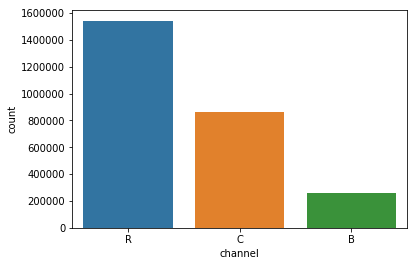

In [86]:
sns.countplot(x='channel', data=merged_df)

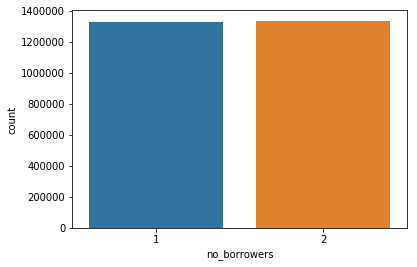

In [87]:
sns.countplot(x='no_borrowers', data=merged_df)

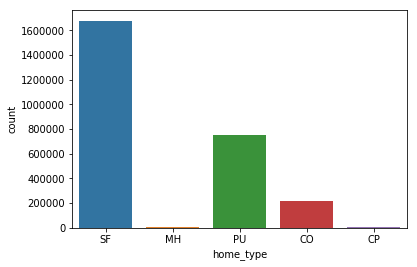

In [88]:
sns.countplot(x='home_type', data=merged_df)

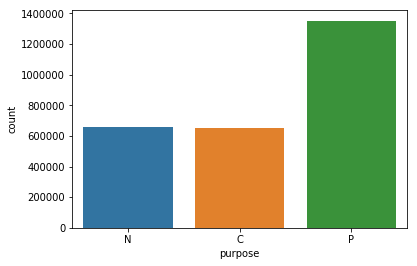

In [89]:
sns.countplot(x='purpose', data=merged_df)

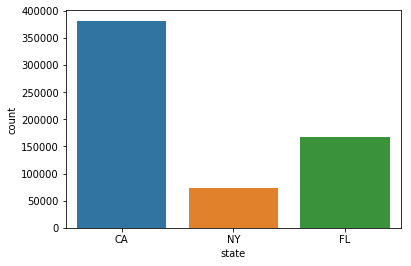

In [90]:
sns.countplot(x='state', data=merged_df.loc[merged_df['state'].isin(['CA','NY','FL'])])

2663274
1173037


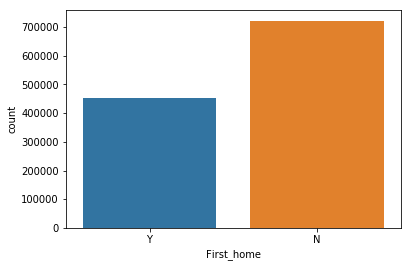

In [104]:
print(len(merged_df))
tmpData = merged_df
tmpData = tmpData[tmpData.First_home != '9']
print(len(tmpData))
sns.countplot(x='First_home', data=tmpData)

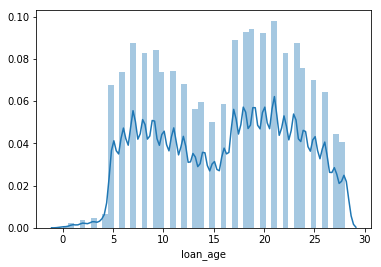

In [105]:
sns.distplot(merged_df.loan_age)

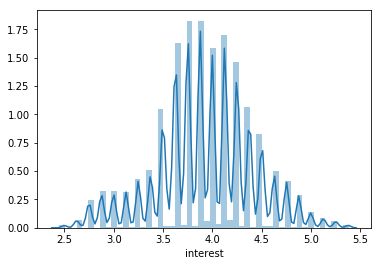

In [95]:
sns.distplot(merged_df.interest)

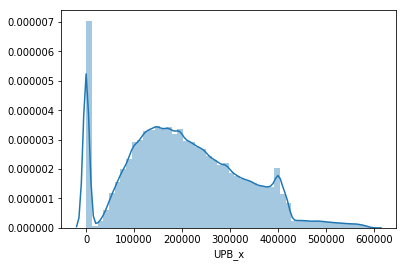

In [96]:
sns.distplot(merged_df.UPB_x)

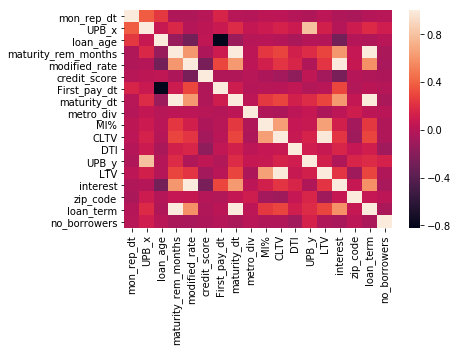

In [97]:
# Calculate correlations
corr = merged_df.drop('num_units', 1).corr()
 
# Heatmap
sns.heatmap(corr)

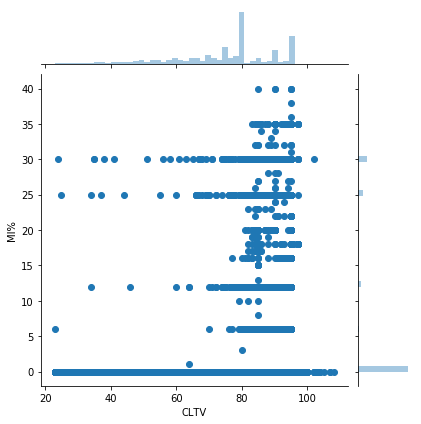

In [98]:
# Joint Distribution Plot
sns.jointplot(x='CLTV', y='MI%', data=merged_df)

# _Inferential Statistics_

- There are few attributes which can be included straight away like CREDIT SCORE,  DEBT-TO-INCOME (DTI) RATIO, ORIGINAL INTEREST RATE etc. 
- But there are few variables which may or may not be crucial like NUMBER OF BORROWERS, CURRENT INTEREST RATE (taking into account any loan modifications) etc. To find out whether they have significant impact on a loan being defaulted or not we will perform two types of tests:
    - t-test -- for numerical variables
    - Chisquare test -- for categorical variables

In [171]:
def test_classification(df,label,yl=[0,50]):
    """
    This function test if the means of the two groups with_tip and without_tip are different at 95% of confidence level.
    It will also generate a box plot of the variable by tipping groups
    label: str, label to test
    yl: tuple or list (default = [0,50]), y limits on the ylabel of the boxplot
    df: pandas.DataFrame (default = data)
    
    Example: run <visualize_continuous(data,'Fare_amount',outlier='on')>
    """
    
    if len(pd.unique(df[label]))==2: #check if the variable is categorical with only two  categores and run chisquare test
        vals=pd.unique(df[label])
        gp1 = df[df.default_status==0][label].value_counts().sort_index()
        gp2 = df[df.default_status==1][label].value_counts().sort_index()
        print ("t-test if {} can be used to distinguish defaulting and non defaulting loans".format(label))
        print (chisquare(gp1,gp2))
    elif len(pd.unique(df[label])) > 2: #other wise  run the t-test
        df.boxplot(column = label, by = 'default_status')
        #plt.ylim(yl)
        #plt.show()
        print ("t-test if {} can be used to distinguish defaulting and non defaulting loans".format(label))
        print ("results: {}".format(ttest_ind(df[df.default_status==0][label].values,df[df.default_status==1][label].values,0,False)))
    else:
        pass

## _Let us find out if the NUMBER OF BORROWERS is a "**statistically significant**" variable to be included in our model._

- Hypothesis test
    - **Null Hypothesis:** NUMBER OF BORROWERS does not play any role in deciding default status and is same in both the scenarios.
    - **Alternate Hypothesis:** NUMBER OF BORROWERS does play a role in deciding default status and is not the same in both the scenarios

In [182]:
t_test_df = merged_df
t_test_df = t_test_df[t_test_df.no_borrowers != 99]
t_test_df['default_status'] = np.where(t_test_df['default_status'] != 0, 1, t_test_df['default_status'])

In [183]:
test_classification(t_test_df,'no_borrowers',[0,25])

t-test if no_borrowers can be used to distinguish defaulting and non defaulting loans
Power_divergenceResult(statistic=28509312.434071325, pvalue=0.0)


- The null p value represents that we can reject the **Null Hypothesis** and accept the **Alternate Hypothesis** that NUMBER OF BORROWES is a statistically significant variable.
- Hence NUMBER OF BORROWERS should be included

## _Let us find out if the MODIFIED RATE is a "**statistically significant**" variable to be included in our model._

- Hypothesis test
    - **Null Hypothesis:** MODIFIED_RATE does not play any role in deciding default status and is same in both the scenarios.
    - **Alternate Hypothesis:** MODIFIED_RATE does play a role in deciding default status and is not the same in both the scenarios

In [180]:
t_test_dff = merged_df
t_test_dff['default_status'] = np.where(t_test_dff['default_status'] != 0, 1, t_test_dff['default_status'])

t-test if modified_rate can be used to distinguish defaulting and non defaulting loans
results: Ttest_indResult(statistic=4.023811630649955, pvalue=5.7283384218521094e-05)


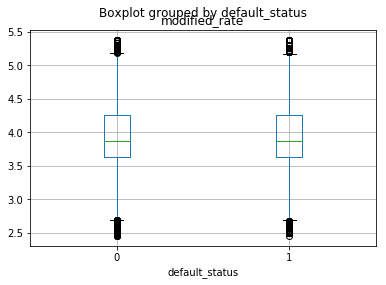

In [181]:
test_classification(t_test_dff,'modified_rate',[0,25])

- The high p value represents that we cannot reject the **Null Hypothesis** and MODIFIED_RATE is not a statistically significant variable.
- Hence MODIFIED_RATE should be dropped.

# Modeling

In [295]:
merged_df_bkp = merged_df
#converting all the codes representing delinquency to 1 in default_status
merged_df['default_status'] = np.where(merged_df['default_status'] != 0, 1, merged_df['default_status'])

In [296]:
len(merged_df_bkp)

2663274

## Preparation functions

In [325]:
#preparation functions
#function to read the data and dropping unnecesary columns (columns with maximum Not Available values and columns found 
#statistically not significant through Hypothesis testing)
def read_data(dataframe, columnsToDrop):
    dataframe = dataframe.drop(labels = columnsToDrop, axis = 1) #dropping unnecessary columns
    dataframe = dataframe.dropna() #dropping null values
    return dataframe


#The function target_variable takes the data returned from read_data and name of the response variable. This function returns a 
#new dataframe with independent variables and response variable separately
def target_variable(data,resp):
    Y = data[resp]
    X = data.drop(resp, axis = 1)
    return X,Y



#S1 - Separation metrics
def ks(score, Y_test):
    ks_promotion_df = pd.DataFrame({'prob_estimates':score, 'good':Y_test})
    ks_promotion_df['bad'] = 1 - ks_promotion_df['good']
    ks_promotion_df['bins'] = pd.cut(ks_promotion_df['prob_estimates'], 10)

    #Creating new dataframe with 10 rows - each representing a part of the probability estimate range
    kd_df = pd.DataFrame()
    grouped = ks_promotion_df.groupby('bins', as_index = False)
    
    kd_df['count_good'] = grouped.sum().good
    kd_df['count_bad'] = grouped.sum().bad
    
    kd_df['cumulative_count_good'] = (kd_df['count_good']/ kd_df['count_good'].sum()).cumsum() * 100
    kd_df['cumulative_count_bad'] = (kd_df['count_bad']/ kd_df['count_bad'].sum()).cumsum() * 100
    
    kd_df['ks_value'] = np.abs(kd_df['cumulative_count_good'] - kd_df['cumulative_count_bad'])
    return(round(0.01*kd_df.ks_value.mean(), 5))

def pr(score, Y_true):
    precision, recall, thresholds = metrics.precision_recall_curve(Y_true, score)
    pr_auc = round(auc(recall, precision), 5)
    return(pr_auc)

def get_precision_recall(score, Y_true):
    precision, recall, thresholds = metrics.precision_recall_curve(Y_true, score)
    return(precision, recall)

#S2 - Spread metric
def avg_per25(bad_scores):
    n = int(round(0.25*len(bad_scores), 0))
    df_scores = np.sort(bad_scores, axis = 0)
    df_end = np.mean(df_scores[len(bad_scores)-n:])
    return((df_end))

def get_resample_value_counts(key, y_resamp):
    re_dic_val = {}
    c = Counter(y_resamp)
    re_dic_val[key] = dict(c)
    return re_dic_val

def check_majority(Y_train):
    value_counts = Y_train.value_counts()
    if(value_counts[Y_train.unique()[0]] >= value_counts[Y_train.unique()[1]]):
        maj = Y_train.unique()[0]
    else:
        maj = Y_train.unique()[1]
    return maj

def check_minority(Y_train):
    value_counts = Y_train.value_counts()
    if(value_counts[Y_train.unique()[0]] >= value_counts[Y_train.unique()[1]]):
        min = Y_train.unique()[1]
    else:
        min = Y_train.unique()[0]
    return min

def execute_fun(resamp_key, resample_func, ml_func, x_test, y_test, resample_title, ml_title, dist_plot = "true", hist_regular = False):

    #Fitting Models
    if(resample_func == None):
        x_resamp, y_resamp = X_train, Y_train
    else:
        x_resamp, y_resamp = resample_func.fit_sample(X_train, Y_train)
    
    if(x_resamp.ndim > 2):
        x_resamp = x_resamp[0,:,:]
        
    if(y_resamp.ndim > 1):
        y_resamp = y_resamp[0,:]

    val_count = get_resample_value_counts(resamp_key, y_resamp)
    
    ml_fit = ml_func.fit(x_resamp, y_resamp)
    scores = ml_fit.predict_proba(x_test)[:,1]
    #print(scores)
    pred_values = ml_fit.predict(x_test)
    
    #Bad Scores
    prediction_df = pd.DataFrame()
    prediction_df['scores'] = scores
    prediction_df[response_variable] = y_test

    #assumption is that majority class is 0 and minority class is 1
    good_scores = np.array(prediction_df.loc[(prediction_df[response_variable] == 0), ['scores']])
    bad_scores = np.array(prediction_df.loc[(prediction_df[response_variable] == 1), ['scores']])
    
    #Outputs
    accuracy = accuracy_score(y_test, pred_values)
    roc_auc = roc_auc_score(y_test, scores)
    pr_score = pr(scores, y_test)
    ks_mean = ks(scores, y_test)
    avg_per = round(avg_per25(bad_scores), 5)
    pre_rec_val = get_precision_recall(scores, y_test)
    precision = pre_rec_val[0]
    recall = pre_rec_val[1]
    
    if(dist_plot == "true"):
        if(hist_regular == False):
            #Dist Plot
            plt.figure(num=None, figsize = (14, 6), dpi = 80, facecolor = 'w', edgecolor = 'k')
            plt.hist(bad_scores, bins=20, range = [0,1], facecolor = 'red', alpha = 1.0, normed = 1, label = 'BAD')
            plt.hist(good_scores, bins=20, range = [0,1], facecolor = 'green', alpha = 0.6, normed = 1, label = 'GOOD')
            plt.title(ml_title + " " + resample_title)
            return(round(pr_score*avg_per, 5), round(ks_mean*avg_per, 5), roc_auc, pr_score, accuracy, val_count)
        elif(hist_regular == True):
            #Dist Plot
            plt.figure(num=None, figsize = (14, 6), dpi = 80, facecolor = 'w', edgecolor = 'k')
            plt.hist(bad_scores, bins=20, range = [0,1], facecolor = 'red', alpha = 1.0, label = 'BAD')
            plt.hist(good_scores, bins=20, range = [0,1], facecolor = 'green', alpha = 0.6, label = 'GOOD')
            plt.title(ml_title + " " + resample_title)
            return(round(pr_score*avg_per, 5), round(ks_mean*avg_per, 5), roc_auc, pr_score, accuracy, val_count)
    
    elif(dist_plot == "false"):
        
        return(round(pr_score*avg_per, 5), round(ks_mean*avg_per, 5), roc_auc, pr_score, accuracy, val_count)
    

def get_results(resamp_dict, ml_dict, disp = "all", dist_plot = "true", hist_regular = False):
    results = []
    val_counts = []
    coun = []
    #FOr loop for machine learning algorithm
    for ml_key in ml_dict:
        ml_value = ml_dict[ml_key]
        #For loop for resample algorithm
        for resamp_key in resamp_dict:
            resamp_value = resamp_dict[resamp_key]
            temp = execute_fun(resamp_key, resamp_value, ml_value, X_test, Y_test, resamp_key, ml_key, dist_plot, hist_regular)
            results.append([ml_key, resamp_key, temp[0], temp[1], temp[2], temp[3], temp[4]])
            val_counts.append(temp[5])
    result = pd.DataFrame(results, columns = ["ML Methods", "Sampling Methods", "PR Average", "KS Average", "ROC AUC", "PR AUC", "Accuracy"])

    for i in range(0, len(val_counts)):
        if val_counts[i] not in val_counts[i+1:]:
            coun.append(val_counts[i])
    print('The majority is: ', check_majority(Y_train))
    print('The minority is: ', check_minority(Y_train))   
    #print(coun)   
        
    result_cord = result[result['Sampling Methods'] == 'Original']
    
    max_df_pr = result.loc[result['PR Average'].idxmax()]
    pr_ml = max_df_pr['ML Methods']
    pr_sm = max_df_pr['Sampling Methods']
    pr_val = max_df_pr['PR Average']
    
    max_df_ks = result.loc[result['KS Average'].idxmax()]
    ks_ml = max_df_ks['ML Methods']
    ks_sm = max_df_ks['Sampling Methods']
    ks_val = max_df_ks['KS Average']
    
    max_df_prauc = result.loc[result['PR AUC'].idxmax()]
    prauc_ml = max_df_prauc['ML Methods']
    prauc_sm = max_df_prauc['Sampling Methods']
    prauc_val = max_df_prauc['PR AUC']
    
          
    if disp == "all":
        plt.figure(figsize=(20,10))
        original_best_val = []
        for m in ml_dict:
            xdfa = np.array(result.loc[result['ML Methods'] == m]["Sampling Methods"])
            xdfb = np.array(result.loc[result['ML Methods'] == m]["PR Average"])
            xdfc = np.array(range(xdfa.shape[0]))
            plt.plot(xdfc, xdfb)
    
            xdfa_co = np.array(result.loc[result['ML Methods'] == m]["Sampling Methods"])
            xdfb_co = np.array(result_cord.loc[result_cord['ML Methods'] == m]["PR Average"])
            xdfc_co = np.array(range(xdfa_co.shape[0]))
            
            for b in xdfb_co:
                original_best_val.append([m + " with original value: ", round(b, 3)])

        plt.xticks(xdfc, xdfa, size = 15, label = "PR", rotation = 45)
        plt.xlabel('RESAMPLING TECHNIQUES', fontsize=15)        
        plt.title("PR*Average 25th Percentile \n Best Combination: " + pr_ml + " and \n" + pr_sm +  " with parameter value = " + str(round(pr_val, 3)), fontsize= 30)
        
        plt.ylim(0,1)
        plt.legend(original_best_val , prop={'size': 20})

        
        plt.figure(figsize=(20,10))
        original_best_val = []
        for m in ml_dict:
            xdfa = np.array(result.loc[result['ML Methods'] == m]["Sampling Methods"])
            xdfb = np.array(result.loc[result['ML Methods'] == m]["KS Average"])
            xdfc = np.array(range(xdfa.shape[0]))
            plt.plot(xdfc, xdfb)
            
            xdfa_co = np.array(result.loc[result['ML Methods'] == m]["Sampling Methods"])
            xdfb_co = np.array(result_cord.loc[result_cord['ML Methods'] == m]["KS Average"])
            xdfc_co = np.array(range(xdfa_co.shape[0]))

            for b in xdfb_co:
                original_best_val.append([m + " with original value: ", round(b, 3)])
                
        plt.xticks(xdfc, xdfa, size = 15, label = "KS", rotation = 45)
        plt.xlabel('RESAMPLING TECHNIQUES', fontsize=15)
        plt.title("KS*Average 25th Percentile \n Best Combination: " + ks_ml + " and \n" + ks_sm +  " with parameter value = " + str(round(ks_val, 3)), fontsize= 30)
        plt.ylim(0,1)
        plt.legend(original_best_val, prop={'size': 20})
        
        
        plt.figure(figsize=(20,10))
        original_best_val = []
        for m in ml_dict:
            xdfa = np.array(result.loc[result['ML Methods'] == m]["Sampling Methods"])
            xdfb = np.array(result.loc[result['ML Methods'] == m]["PR AUC"])
            xdfc = np.array(range(xdfa.shape[0]))
            plt.plot(xdfc, xdfb)
            
            xdfa_co = np.array(result.loc[result['ML Methods'] == m]["Sampling Methods"])
            xdfb_co = np.array(result_cord.loc[result_cord['ML Methods'] == m]["PR AUC"])
            xdfc_co = np.array(range(xdfa_co.shape[0]))
            
            for b in xdfb_co:
                original_best_val.append([m + " with original value: ", round(b, 3)])

        plt.xticks(xdfc, xdfa, size = 15, label = "PR AUC", rotation = 45)
        plt.xlabel('RESAMPLING TECHNIQUES', fontsize=15)
        plt.title("PR AUC", fontsize= 30)
        plt.title("PR AUC \n Best Combination: " + prauc_ml + " and \n" + prauc_sm +  " with parameter value = " + str(round(prauc_val, 3)), fontsize= 30)
        plt.ylim(0,1)
        plt.legend(original_best_val, prop={'size': 20})
        
        
        return(result)

    elif disp == "pr":
        plt.figure(figsize=(20,10))
        original_best_val = []
        for m in ml_dict:
            xdfa = np.array(result.loc[result['ML Methods'] == m]["Sampling Methods"])
            xdfb = np.array(result.loc[result['ML Methods'] == m]["PR Average"])
            xdfc = np.array(range(xdfa.shape[0]))
            plt.plot(xdfc, xdfb)
            
            xdfa_co = np.array(result.loc[result['ML Methods'] == m]["Sampling Methods"])
            xdfb_co = np.array(result_cord.loc[result_cord['ML Methods'] == m]["PR Average"])
            xdfc_co = np.array(range(xdfa_co.shape[0]))

            for b in xdfb_co:
                original_best_val.append([m + " with original value: ", round(b, 3)])
                
        plt.xticks(xdfc, xdfa, size = 15, label = "PR", rotation = 45)
        plt.xlabel('RESAMPLING TECHNIQUES', fontsize=15)
        plt.title("PR*Average 25th Percentile \n Best Combination: " + pr_ml + " and \n" + pr_sm +  " with parameter value " + str(round(pr_val, 3)), fontsize= 30)
        plt.ylim(0,1)
        plt.legend(original_best_val, prop={'size': 20})
        return(result.loc[:, ['ML Methods', 'Sampling Methods', 'PR Average']])

    elif disp == "ks":
        plt.figure(figsize=(20,10))
        original_best_val = []
        for m in ml_dict:
            xdfa = np.array(result.loc[result['ML Methods'] == m]["Sampling Methods"])
            xdfb = np.array([0.3894, 0.5510, 0.6439, 0.7212, 0.6691])
            xdfc = np.array(range(xdfa.shape[0]))
            plt.plot(xdfc, xdfb)
            
            xdfa_co = np.array(result.loc[result['ML Methods'] == m]["Sampling Methods"])
            xdfb_co = np.array(result_cord.loc[result_cord['ML Methods'] == m]["KS Average"])
            xdfc_co = np.array(range(xdfa_co.shape[0]))

            for b in xdfb_co:
                original_best_val.append([m + " with original value: ", round(b, 3)])
        
        plt.xticks(xdfc, xdfa, size = 15, label = "KS", rotation = 45)
        plt.xlabel('RESAMPLING TECHNIQUES', fontsize=15)
        plt.ylim(0,1)
        plt.title("KS \n Best Combination: Random Forest " + " and \n" + "SMOTE with parameter value = 0.7212", fontsize= 30)
        plt.legend("Random Forest with original value 0.3894", prop={'size': 20})
        data = np.array([['','ML Methods','Sampling Methods', 'KS'],['0','Random Forest','Original', '0.3894'],['1','Random Forest','Under', '0.5510'], ['2','Random Forest','NearMiss1', '0.6439'], ['3','Random Forest','SMOTE', '0.7212'], ['4','Random Forest','SMOTETomek', '0.6691']])
        return(pd.DataFrame(data=data[1:,1:], index=data[1:,0], columns=data[0,1:]))



#function to get the final results
def get_final_results(default = True, specific_samplin = [], specific_ml_methods = [], disp = 'pr', dist_plot = 'false', sampling_ratio = {}, hist_regular = False):
    orig_with_no_sampling = ['Original']
    if(default):
        return get_results(categ_sampling_dict, ml_default_dict, disp = disp, dist_plot = dist_plot)
    else:
        #Always include Original
        return get_results(get_specific_samplin_dict(orig_with_no_sampling + specific_samplin, sampling_ratio), get_specific_ml_dict(specific_ml_methods), disp = disp, dist_plot = dist_plot, hist_regular = hist_regular)



## Set of all the Machine learning algorithm to be available

In [299]:
ml_algs = [LogisticRegression(), GaussianNB(), RandomForestClassifier(), GradientBoostingClassifier()]
ml_names = ["Logistic", "Naive Bayes", "Random Forest", "Gradient Boosting"]

all_ml_dict = {}
for i in range(len(ml_algs)):
    all_ml_dict[ml_names[i]] = ml_algs[i]

## Default Machine learning algorithm to be available

In [284]:
ml_default_dict = collections.OrderedDict()
ml_default_dict = {"Logistic":LogisticRegression(), "Random Forest":RandomForestClassifier()}
ml_default_dict

{'Logistic': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='warn',
           n_jobs=None, penalty='l2', random_state=None, solver='warn',
           tol=0.0001, verbose=0, warm_start=False),
 'Random Forest': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=None, max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
             oob_score=False, random_state=None, verbose=0,
             warm_start=False)}

## Set of all sampling techniques available

In [285]:
seed = 42
all_dict = collections.OrderedDict()
all_dict = {"Original":None, 
              "Under":RandomUnderSampler(random_state = seed), 
              "NearMiss1":NearMiss(random_state = seed, version = 1),
             "NearMiss2":NearMiss(random_state = seed, version = 2), 
              "NearMiss3":NearMiss(random_state = seed, version = 3), 
             "Cluster Centroids":ClusterCentroids(random_state = seed), 
              "Repeated Edited Nearest Neighbours":RepeatedEditedNearestNeighbours(random_state = seed), 
             "One Sided Selection": OneSidedSelection(random_state = seed), 
              "Instance Hardness Threshold":InstanceHardnessThreshold(random_state = seed, estimator = LogisticRegression()),
              "Condensed Nearest Neighbour":CondensedNearestNeighbour(random_state = seed), 
              "Neighborhood Cleaning Rule":NeighbourhoodCleaningRule(random_state = seed),
            "Oversample":RandomOverSampler(random_state = seed), 
             "ADASYN":ADASYN(random_state=seed), 
            "SMOTE":SMOTE(random_state=seed, kind = 'regular'), 
             "SMOTE SVM":SMOTE(random_state=seed, kind = 'svm'),
             #"SMOTENC":SMOTENC(random_state=seed, categorical_features=check_if_categorical(data)),
            "SMOTE Borderline1": SMOTE(random_state=seed, kind = 'borderline1'), 
             "SMOTE Borderline2":SMOTE(random_state=seed, kind = 'borderline2'),
            "SMOTEENN":SMOTEENN(random_state=seed),
            "SMOTETomek":SMOTETomek(random_state=seed),
            "BalanceCascade":BalanceCascade(random_state=seed),
            "EasyEnsemble":EasyEnsemble(random_state=seed),      
           }

## Set of default sampling techniques available

In [286]:
seed = 42
categ_sampling_dict = collections.OrderedDict()
categ_sampling_dict = {"Original":None, 
              "Under":RandomUnderSampler(random_state = seed), 
              "NearMiss1":NearMiss(random_state = seed, version = 1),
             "NearMiss2":NearMiss(random_state = seed, version = 2), 
              "NearMiss3":NearMiss(random_state = seed, version = 3), 
              "Repeated Edited Nearest Neighbours":RepeatedEditedNearestNeighbours(random_state = seed), 
             "One Sided Selection": OneSidedSelection(random_state = seed), 
              "Instance Hardness Threshold":InstanceHardnessThreshold(random_state = seed, estimator = LogisticRegression()),
              "Condensed Nearest Neighbour":CondensedNearestNeighbour(random_state = seed), 
              "Neighborhood Cleaning Rule":NeighbourhoodCleaningRule(random_state = seed),
            "Oversample":RandomOverSampler(random_state = seed)}

## Getting particular input machine learning algorithms given by user

In [287]:
def get_specific_ml_dict(ml):
    specific_ml_dict = {}

    for i in ml:
        if i in all_ml_dict:
            specific_ml_dict[i] = all_ml_dict[i]
    return specific_ml_dict

## Getting particular input sampling techniques given by user

In [288]:
def get_specific_samplin_dict(sampling, sampling_ratio):
    seed = 42

    specific_samplin_dict = {}

    for i in sampling:
        if i in all_dict:
            specific_samplin_dict[i] = all_dict.get(i)
            
    for name, ratio in sampling_ratio.items():
        for i in ratio:
            print(i)
            print(all_dict.get(i))
            specific_samplin_dict[str(n) + " with ratio " + str(i) + " "] = all_dict.get(n)
            specific_samplin_dict["Under with ratio " + str(i) + " "] = RandomUnderSampler(random_state = seed, sampling_strategy=sampling_strategy)

    return specific_samplin_dict

# Execution of Model

In [310]:
merged_df = merged_df_bkp
data = read_data(merged_df, columnsToDrop = ['PPM','sup_conform','modified_rate', 'seller', 'servicer', 'mon_rep_dt', 'First_pay_dt', 'maturity_dt','loan_id']) 

In [311]:
# keeping only CALIFORNIA observations in data - to model using a subset of original data 
test_data = data
test_data = test_data.loc[test_data['state'] == 'NY']

# resetting index to start from 0
test_data = test_data.reset_index(drop=True)

test_data = pd.get_dummies(test_data, prefix=['First_home', 'occupancy', 'channel', 'prod_type', 'home_type', 'purpose'],
                     columns=['First_home', 'occupancy', 'channel', 'prod_type', 'home_type', 'purpose'])

#percent od defaulters
Defaulters1 = (test_data['default_status'] != 0).sum()
Non_Defaulters1 = (test_data['default_status'] == 0).sum()
print("defaulter are {} and non defaulter are {}".format(Defaulters1, Non_Defaulters1))
print("defaulters percentage is {}".format((Defaulters1/Non_Defaulters1)*100))

test_data = read_data(test_data, columnsToDrop = ['state']) 
test_data.head()

defaulter are 5172 and non defaulter are 67895
defaulters percentage is 7.617644892849253


,UPB_x,default_status,loan_age,maturity_rem_months,credit_score,metro_div,MI%,num_units,CLTV,DTI,...,channel_R,prod_type_FRM,home_type_CO,home_type_CP,home_type_MH,home_type_PU,home_type_SF,purpose_C,purpose_N,purpose_P
0,346527.66,0,28,332,799,35614.0,0,1,60,41,...,1,1,0,0,0,0,1,1,0,0
1,89095.81,0,27,213,748,35614.0,0,1,49,16,...,1,1,0,0,0,0,1,1,0,0
2,133715.22,0,28,332,656,35614.0,0,1,38,45,...,1,1,0,0,0,0,1,0,1,0
3,115142.48,0,28,332,724,46540.0,0,1,48,22,...,1,1,0,0,0,0,1,0,0,1
4,81811.41,0,28,332,736,31084.0,25,1,90,25,...,1,1,0,0,0,0,1,0,0,1


In [272]:
pandas_profiling.ProfileReport(test_data)

Number of variables,34
Number of observations,381565
Total Missing (%),0.0%
Total size in memory,56.0 MiB
Average record size in memory,154.0 B
Numeric,11
Categorical,0
Boolean,19
Date,0
Text (Unique),0
Rejected,4


In [312]:
response_variable = "default_status"
X,Y=target_variable(test_data,response_variable)

In [313]:
#Spliting in test train dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1)

In [314]:
le=LabelEncoder()
# Iterating over all the common columns in train and test
for col in X_train.columns.values:
    # Encoding only categorical variables
    if X_train[col].dtypes=='object':
        # Using whole data to form an exhaustive list of levels
        data=X_test[col].append(X_train[col])
        le.fit(data.values)
        X_train[col]=le.transform(X_train[col])
        X_test[col]=le.transform(X_test[col])
        
Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

The majority is:  0
The minority is:  1


,ML Methods,Sampling Methods,KS
0,Random Forest,Original,0.3894
1,Random Forest,Under,0.5510
2,Random Forest,NearMiss1,0.6439
3,Random Forest,SMOTE,0.7212
4,Random Forest,SMOTETomek,0.6691


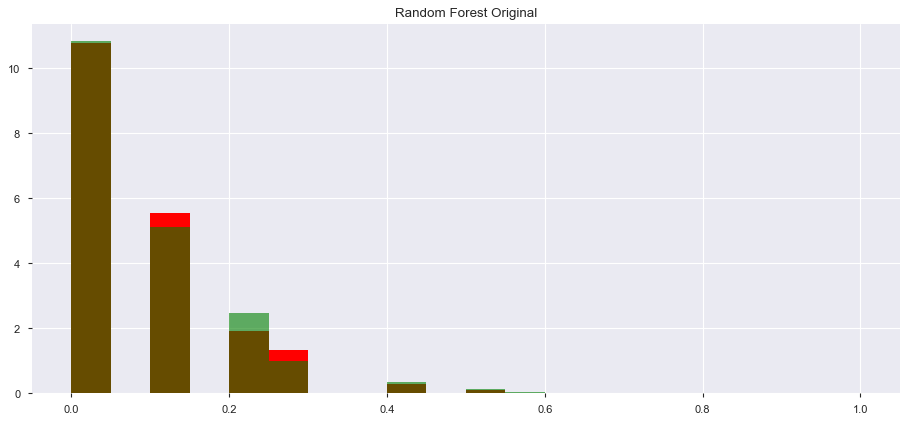

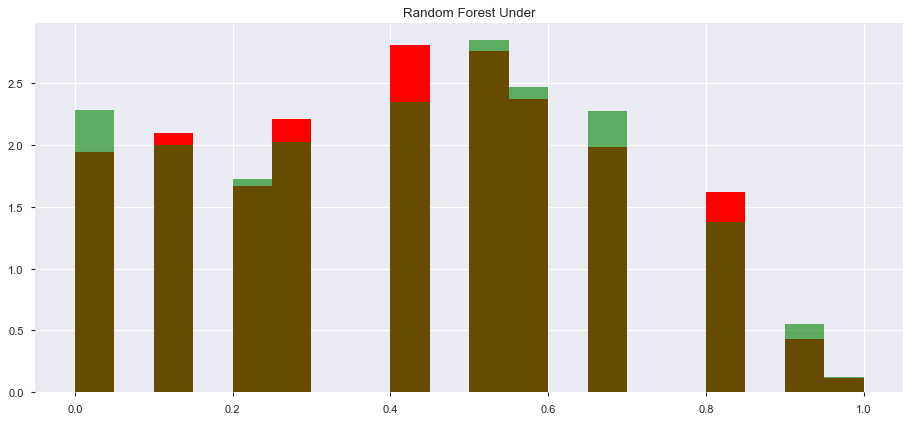

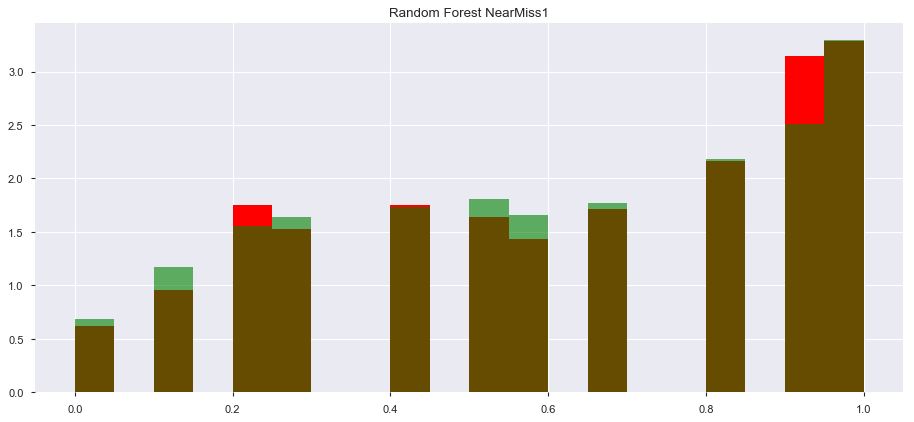

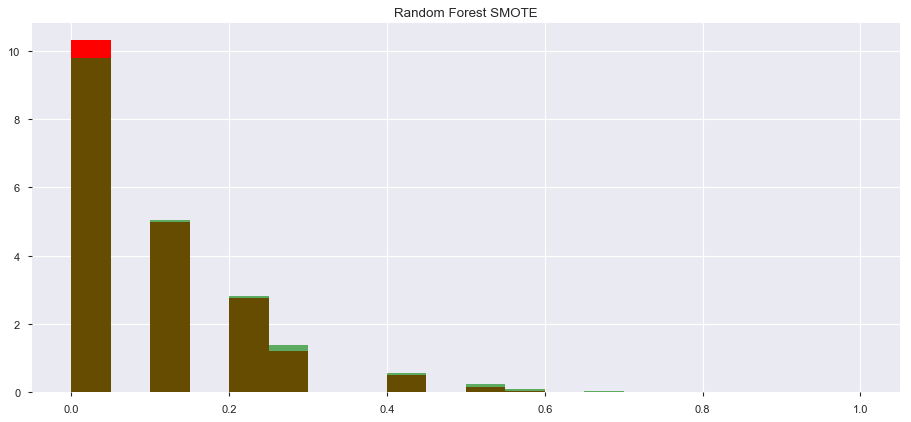

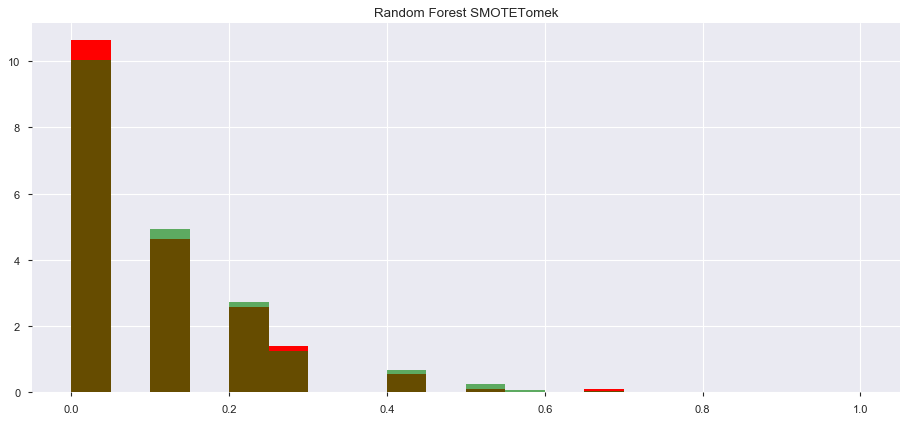

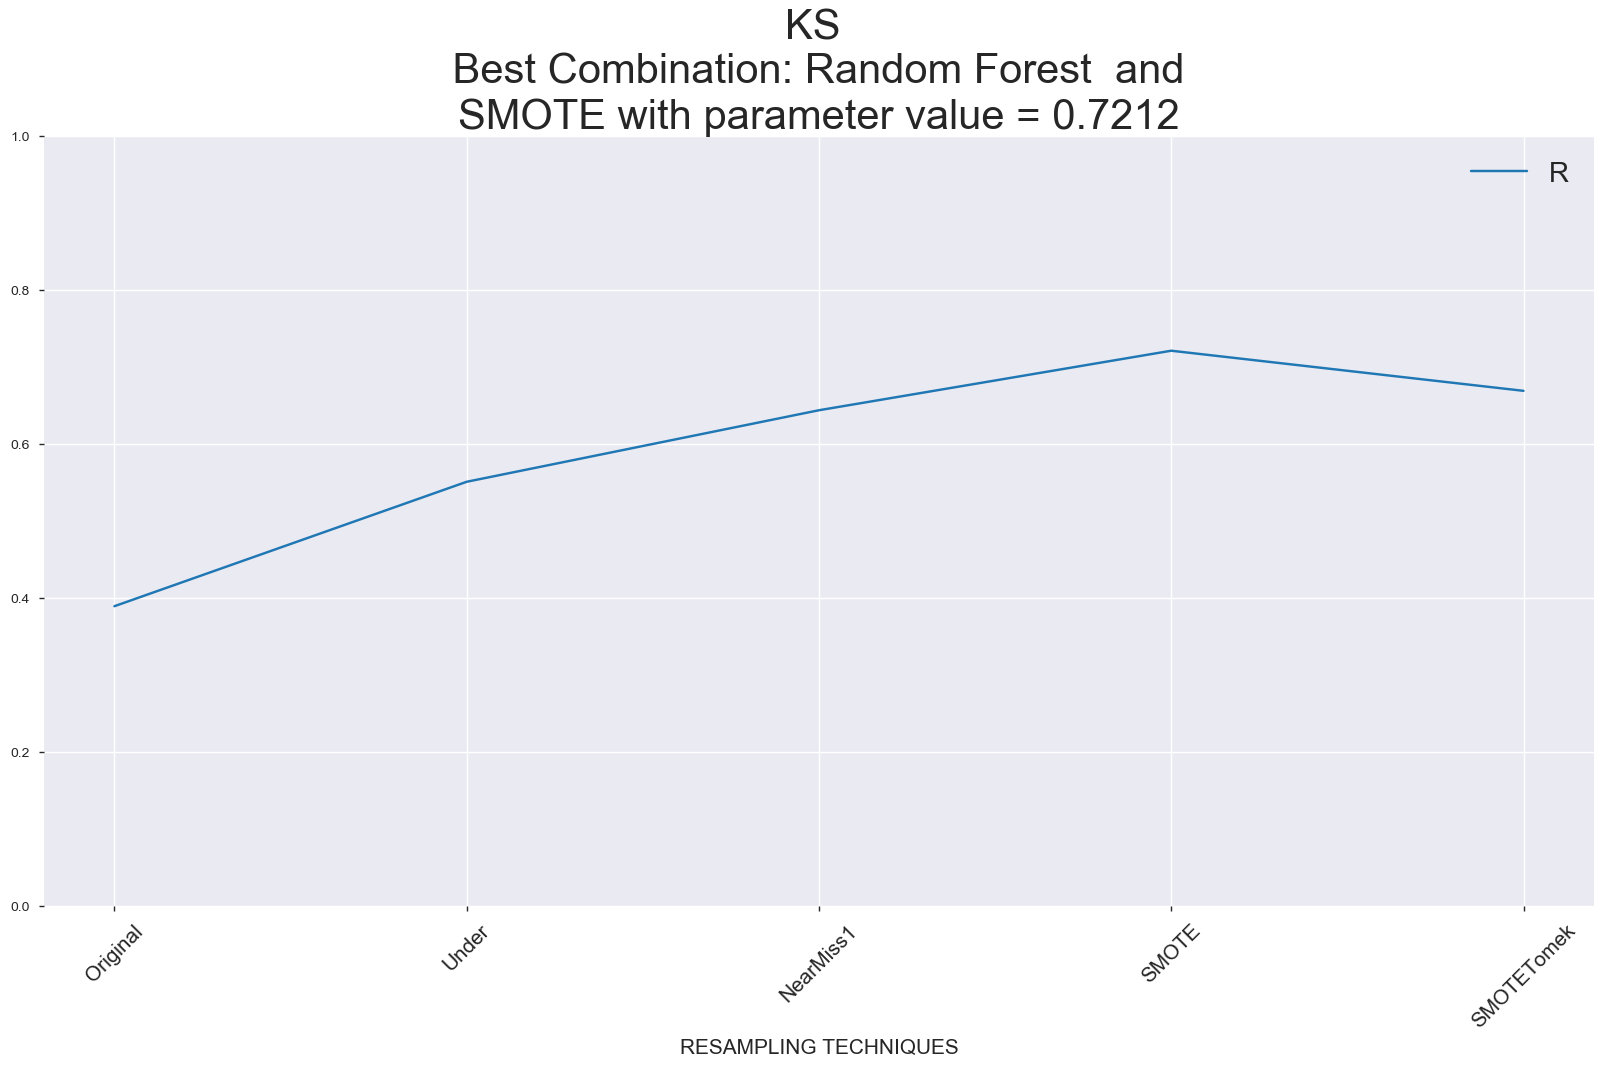

In [326]:
get_final_results(default = False, specific_samplin = ['Under','NearMiss1', 'SMOTE', 'SMOTETomek'], 
            specific_ml_methods = ['Random Forest'], disp = 'ks', dist_plot = 'true', hist_regular = False)